<a href="https://colab.research.google.com/github/cascon81/biomaterial-analyser/blob/main/Printabilidade_geral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Carrega o modelo treinado
modelo = tf.keras.models.load_model('/content/modelo.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Função de pré-processamento
def preprocessar_imagem(caminho):
    img = Image.open(caminho).convert('RGB').resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # (1, 128, 128, 3)
    return img

In [ ]:
# Faz a predição e retorna os valores
def predizer(caminho):
    img = preprocessar_imagem(caminho)
    pred = modelo.predict(img)
    return pred[0][0], pred[0][1]  # [printabilidade, erro]

Saving img01.png to img01.png


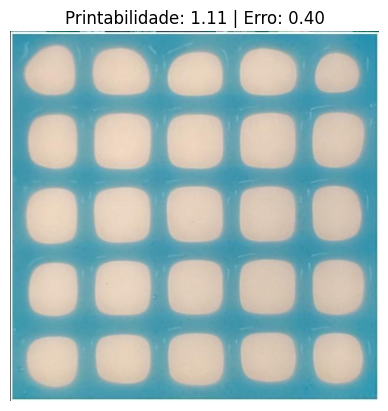

In [ ]:
# Upload da imagem
uploaded = files.upload()

# Loop para cada imagem carregada
for filename in uploaded.keys():
    caminho = f'/content/{filename}'

    # Exibição da imagem
    img = Image.open(caminho)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Printabilidade: {printab:.2f} | Erro: {erro:.2f}")
    plt.show()
